In [2]:
%matplotlib inline

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

==========================
Data Tidying and Cleaning
==========================

In [4]:
pew = pd.read_csv('data/ds_l2/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [5]:
pew_tidy = pew.melt(id_vars='religion', var_name='income', value_name='frequency')
pew_tidy

,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [6]:
tb = pd.read_csv('data/ds_l2/tb.csv')
tb.loc[tb.iso2.isna(), 'iso2'] = 'NA'
tb

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [7]:
tb_tidy = tb.melt(id_vars=['iso2', 'year'], var_name='sex_and_age', value_name='cases')
tb_tidy = tb_tidy.dropna()
tb_tidy

,iso2,year,sex_and_age,cases
15,AD,2005,m04,0.0
16,AD,2006,m04,0.0
18,AD,2008,m04,0.0
42,AE,2006,m04,0.0
43,AE,2007,m04,0.0
...,...,...,...,...
115195,VU,2008,fu,0.0
115269,YE,2008,fu,0.0
115323,ZA,2008,fu,0.0
115350,ZM,2008,fu,0.0


In [8]:
tb_tidy['sex'] = tb_tidy.sex_and_age.str.slice(0, 1)
tb_tidy['agegroup'] = tb_tidy.sex_and_age.str.slice(1)
tb_tidy

,iso2,year,sex_and_age,cases,sex,agegroup
15,AD,2005,m04,0.0,m,04
16,AD,2006,m04,0.0,m,04
18,AD,2008,m04,0.0,m,04
42,AE,2006,m04,0.0,m,04
43,AE,2007,m04,0.0,m,04
...,...,...,...,...,...,...
115195,VU,2008,fu,0.0,f,u
115269,YE,2008,fu,0.0,f,u
115323,ZA,2008,fu,0.0,f,u
115350,ZM,2008,fu,0.0,f,u


In [9]:
tb_tidy = tb_tidy.drop(columns='sex_and_age')
tb_tidy

,iso2,year,cases,sex,agegroup
15,AD,2005,0.0,m,04
16,AD,2006,0.0,m,04
18,AD,2008,0.0,m,04
42,AE,2006,0.0,m,04
43,AE,2007,0.0,m,04
...,...,...,...,...,...
115195,VU,2008,0.0,f,u
115269,YE,2008,0.0,f,u
115323,ZA,2008,0.0,f,u
115350,ZM,2008,0.0,f,u


In [10]:

def proces_age_groups(age_group):
    ages = {"04": "0-4", "65": "65+", "u": "unknown"}
    if age_group in ages:
        return ages[age_group]
    else:
        return f"{age_group[:-2]}-{age_group[-2:]}"


tb_tidy.agegroup = tb_tidy.agegroup.apply(proces_age_groups)

In [11]:
tb_tidy.sort_values(['iso2', 'year'])

,iso2,year,cases,sex,agegroup
11544,AD,1996,0.0,m,0-14
17313,AD,1996,0.0,m,15-24
23082,AD,1996,0.0,m,25-34
28851,AD,1996,4.0,m,35-44
34620,AD,1996,1.0,m,45-54
...,...,...,...,...,...
92303,ZW,2008,2890.0,f,35-44
98072,ZW,2008,467.0,f,45-54
103841,ZW,2008,174.0,f,55-64
109610,ZW,2008,105.0,f,65+


In [12]:
weather_data = pd.read_csv('data/ds_l2/weather.csv')
weather_data

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.3,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.7,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.2,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.2,NaN,NaN,NaN,NaN


In [13]:
weather_data = weather_data.melt(id_vars=['id', 'year', 'month', 'element'], var_name='day')
# tb_tidy = tb.melt(id_vars=['iso2', 'year'], var_name='sex_and_age', value_name='cases')

In [14]:
weather_data.day = weather_data.day.str.slice(1).astype(int)

In [15]:
weather_data = weather_data.pivot_table(index=['id', 'year', 'month', 'day'], columns='element', values='value')
weather_data = weather_data.reset_index()

In [38]:
weather_data['date'] = pd.to_datetime(weather_data[['year', 'month', 'day']])

In [39]:
weather_data

element,id,year,month,day,tmax,tmin,date
0,MX17004,2010,1,30,27.8,14.5,2010-01-30
1,MX17004,2010,2,2,27.3,14.4,2010-02-02
2,MX17004,2010,2,3,24.1,14.4,2010-02-03
3,MX17004,2010,2,11,29.7,13.4,2010-02-11
4,MX17004,2010,2,23,29.9,10.7,2010-02-23
5,MX17004,2010,3,5,32.1,14.2,2010-03-05
6,MX17004,2010,3,10,34.5,16.8,2010-03-10
7,MX17004,2010,3,16,31.1,17.6,2010-03-16
8,MX17004,2010,4,27,36.3,16.7,2010-04-27
9,MX17004,2010,5,27,33.2,18.2,2010-05-27


In [40]:
weather_data.to_csv('data/ds_l2/clean_data.csv')

In [41]:
bilboard = pd.read_csv('data/ds_l2/billboard.csv')
bilboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
bilboard[bilboard.wk65.notna()]

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
62,2000,Creed,Higher,5:16,1999-09-11,81,77.0,73.0,63.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
bilboard = bilboard.rename(columns={'date.entered': 'date_entered'})

In [52]:
bilboard_tidy = bilboard.melt(
    id_vars=['year', 'artist', 'track', 'time', 'date_entered'],
    var_name='week',
    value_name='position')

In [54]:
bilboard_tidy.week.str.startswith('wk').all()

True

In [56]:
bilboard_tidy.week = bilboard_tidy.week.str.slice(2).astype(int)

In [57]:
bilboard_tidy

,year,artist,track,time,date_entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,76,NaN


In [58]:
bilboard_tidy.year.unique()

array([2000])

In [59]:
bilboard_tidy = bilboard_tidy.dropna()

In [60]:
bilboard_tidy

,year,artist,track,time,date_entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57.0
...,...,...,...,...,...,...,...
19716,2000,Creed,Higher,5:16,1999-09-11,63,50.0
19833,2000,Lonestar,Amazed,4:25,1999-06-05,63,45.0
20033,2000,Creed,Higher,5:16,1999-09-11,64,50.0
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50.0


In [61]:
bilboard_tidy[bilboard_tidy.week == 10]

,year,artist,track,time,date_entered,week,position
2855,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,10,51.0
2856,2000,3 Doors Down,Loser,4:24,2000-10-21,10,61.0
2857,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,10,57.0
2858,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,10,6.0
2860,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,10,36.0
...,...,...,...,...,...,...,...
3162,2000,"Wills, Mark",Back At One,4:00,2000-01-15,10,46.0
3163,2000,"Worley, Darryl",When You Need My Lov...,3:35,2000-06-17,10,80.0
3164,2000,"Wright, Chely",It Was,3:51,2000-03-04,10,98.0
3167,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,10,89.0


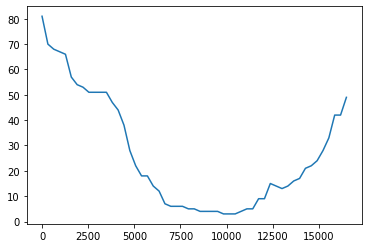

In [67]:
plt.plot(bilboard_tidy[(bilboard_tidy.artist == '3 Doors Down') & (bilboard_tidy.track == 'Kryptonite')].position)

In [69]:
bilboard_tidy[['track', 'artist', 'time']].drop_duplicates()

,track,artist,time
0,Baby Don't Cry (Keep...,2 Pac,4:22
1,The Hardest Part Of ...,2Ge+her,3:15
2,Kryptonite,3 Doors Down,3:53
3,Loser,3 Doors Down,4:24
4,Wobble Wobble,504 Boyz,3:35
...,...,...,...
312,Another Nine Minutes,Yankee Grey,3:10
313,Real Live Woman,"Yearwood, Trisha",3:55
314,Whistle While You Tw...,Ying Yang Twins,4:19
315,Kernkraft 400,Zombie Nation,3:30
